### Simpler Linear Regression (SLR)
1. Step 1: Import necessary libraries
2. Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
3. Step 3: Creating a Linear Regression Model
4. Step 4: Training the model using data set
5. Step 5: Get the values of slope and intercept from the trained model
6. Step 6: Display the equation of the line
7. Step 7: Predit values using the model
8. Step 8: Plot the regression line
9. step 9: Prediction Features

In [2]:
# step 1. Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error ,mean_absolute_error,root_mean_squared_error
import statsmodels.api as sm

In [4]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)
X=np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1) # Independent variable
true_salaries=np.array([30,35,40,45,50,55,60,65,70,75])

In [5]:
# Adding some random noise to salaries 
noise=np.random.normal(0,5,size=true_salaries.shape)
Y=true_salaries+noise # Dependent variable

In [6]:
# Step 3: Creating a Linear Regression Model
model=LinearRegression()

In [7]:
##Step 4: Training the model using data set
model.fit(X,Y) # Y=m*X+c

LinearRegression()

In [8]:
# Step 5: Get the values of slope and intercept from the trained model
model.coef_ # slope

array([4.96549814])

In [9]:
model.intercept_ # Intercept 

27.430065779800536

In [10]:
# Step 6: Display the equation of the line
print(f"Equation of Line is :  Y={model.coef_ [0]:.2f}*X + {model.intercept_:.2f}")

Equation of Line is :  Y=4.97*X + 27.43


In [11]:
# Step 7: Predit values using the model and evalation
y_pred=model.predict(X)

#### Model Evalution Techniques


### Mean Absolute Error (MAE)
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

### Root Mean Squared Error (RMSE)
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

### Coefficient of Determination (\( R^2 \))
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

### Adjusted \( R^2 \)
$$R^2_{adj} = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right)$$



In [13]:
r2=r2_score(Y,y_pred)
print("R2 Score is:",r2)

R2 Score is: 0.9453822032109368


In [14]:
mse=mean_squared_error(Y,y_pred)
print("Mean Squared Error (MSE):",mse)

Mean Squared Error (MSE): 11.751853009895184


In [15]:
mae=mean_absolute_error(Y,y_pred) 
print("Mean absolute error (MAE):",mae)

Mean absolute error (MAE): 2.8682734655736786


In [16]:
rmse=root_mean_squared_error(Y,y_pred)
print("Root Mean Squared error (RMSE):",rmse)

Root Mean Squared error (RMSE): 3.4280975788176136


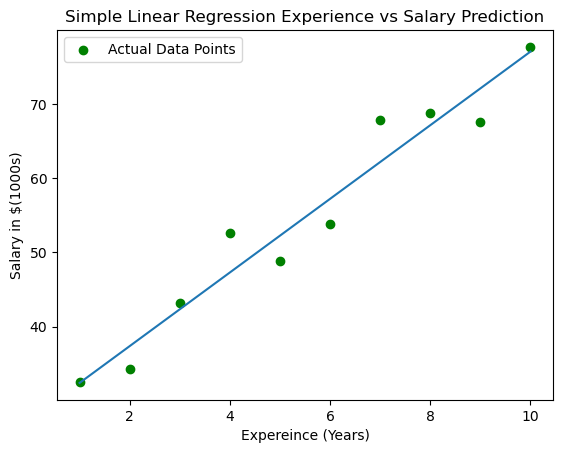

In [17]:
# Step 8: Plot the regression line
plt.scatter(X,Y,label='Actual Data Points',c='g')
plt.plot(X,y_pred)
plt.xlabel('Expereince (Years)')
plt.ylabel('Salary in $(1000s)')
plt.title('Simple Linear Regression Experience vs Salary Prediction')
plt.legend()
plt.show()

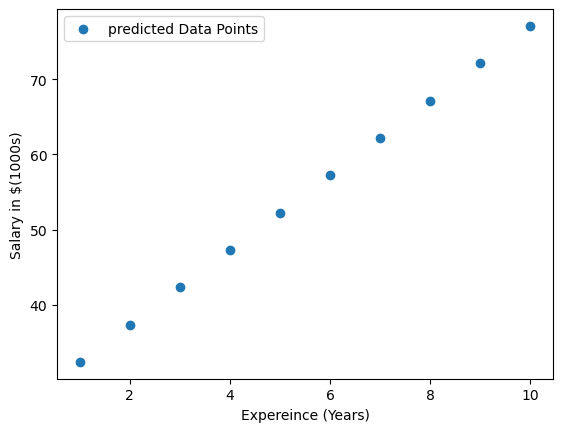

In [18]:
plt.scatter(X,model.predict(X),label='predicted Data Points')
plt.xlabel('Expereince (Years)')
plt.ylabel('Salary in $(1000s)')
plt.legend()
# plt.plot(X,model.predict(X),c='r')
plt.show()

## Prediction

In [20]:
## step 9: Prediction Features
exp=int(input("Enter the Exprience"))
salary=model.predict([[exp]])
print(f"Salary is : {salary[0]:.2f}K")

Enter the Exprience 4


Salary is : 47.29K


In [48]:
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation

In [50]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [52]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [54]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:09:12   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\saich\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
